In [1]:
from diffusers import DDPMPipeline
import torch
from torchvision import transforms
from torch.distributions import Categorical
from PIL import Image
import matplotlib.pyplot as plt
from utils import plot_image
from tqdm import tqdm
import numpy as np

/users/eleves-a/2021/gaetan.narozniak/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-10 16:12:34.715513: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 16:12:34.722263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744294354.730323   55100 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744294354.732747   55100 cuda_

In [2]:
model_id = "google/ddpm-ema-celebahq-256"
ddpm = DDPMPipeline.from_pretrained(model_id)
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print("using device: ", device)

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch /users/eleves-a/2021/gaetan.narozniak/.cache/huggingface/hub/models--google--ddpm-ema-celebahq-256/snapshots/4cb6117472e6e4f45c5afe606b101858c27c3802: Error no file named diffusion_pytorch_model.safetensors found in directory /users/eleves-a/2021/gaetan.narozniak/.cache/huggingface/hub/models--google--ddpm-ema-celebahq-256/snapshots/4cb6117472e6e4f45c5afe606b101858c27c3802.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 34.36it/s]

using device:  cuda:0


In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

image = Image.open("pictures/gaetan.jpeg").convert("RGB")
tensor_image = transform(image).unsqueeze(0).to(device)
tensor_image.shape

torch.Size([1, 3, 256, 256])

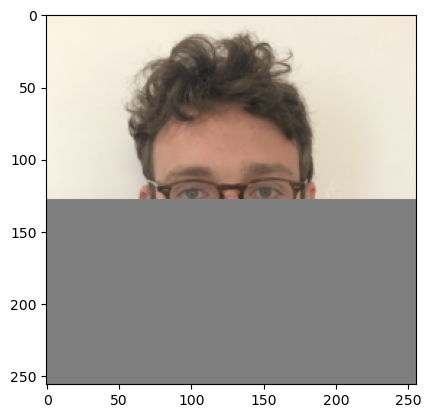

  7%|▋         | 1/15 [00:01<00:22,  1.57s/it]

tensor([7078.3047, 7159.3320, 7107.1016, 7151.9688, 7176.6680, 7105.5781,
        7200.6797, 7191.9922, 7154.2109, 7301.0469, 7193.3516, 7226.7500,
        7065.7852, 7230.9609, 7100.7578, 7328.9141, 7099.0117, 7065.3516,
        7110.6719, 7091.0781, 7137.0117, 7121.0078, 7299.5898, 7059.1641,
        7190.6055, 7163.5117, 7138.0391, 7246.8242, 7066.7500, 7170.8047,
        7140.5703, 7245.6836], device='cuda:0') tensor([23, 29, 11, 29,  4, 11,  6, 10, 15, 20, 24, 29, 13, 10,  3, 22, 15, 10,
        22, 31,  4, 22, 21, 13, 31, 22,  4, 25, 27, 14,  2, 13],
       device='cuda:0')


 13%|█▎        | 2/15 [00:02<00:18,  1.43s/it]

tensor([6882.7695, 6732.9531, 6829.6172, 6775.1289, 6988.2891, 6975.6484,
        6824.5469, 6860.5352, 6780.1953, 6730.1289, 6669.8555, 6811.9531,
        6875.4062, 6883.5078, 7014.6641, 6972.7891, 6797.9609, 6805.2266,
        6910.1953, 6782.8672, 7017.2188, 6887.6445, 7085.7148, 6870.8281,
        6743.8789, 6934.9531, 7004.8125, 6928.1680, 6815.6914, 6840.8359,
        6927.7422, 6820.6992], device='cuda:0') tensor([20, 13, 22, 20, 22, 14, 22, 27, 25, 22, 20,  5, 25, 14,  6, 26,  5, 22,
        22, 20, 25, 31, 22, 22, 15, 14, 14, 15, 25, 22, 14, 14],
       device='cuda:0')


 20%|██        | 3/15 [00:04<00:16,  1.35s/it]

tensor([6714.3789, 6688.9141, 6605.1094, 6733.3281, 6544.1289, 6754.3281,
        6537.8047, 6674.8672, 6673.3594, 6731.8047, 6676.9414, 6812.6406,
        6613.5391, 6732.8320, 6743.0547, 6563.9570, 6689.7227, 6568.3281,
        6667.9219, 6788.5859, 6593.5078, 6547.6133, 6720.7812, 6662.0547,
        6655.8867, 6822.4570, 6815.4297, 6692.5742, 6667.1406, 6638.7344,
        6732.6172, 6714.4336], device='cuda:0') tensor([13, 25, 19, 11, 19, 19, 22,  2,  8, 26,  3, 11, 25,  3, 13,  7,  5, 26,
        11, 26,  3, 28, 11, 11,  4, 19,  3,  8, 11, 25, 26, 28],
       device='cuda:0')


 27%|██▋       | 4/15 [00:05<00:14,  1.31s/it]

tensor([6452.4609, 6589.5117, 6546.6367, 6614.0078, 6561.1016, 6602.5078,
        6423.5352, 6460.5547, 6535.9453, 6599.4180, 6626.0117, 6516.5000,
        6522.1211, 6609.4883, 6510.5000, 6431.7188, 6530.7617, 6596.5078,
        6544.6875, 6628.2578, 6608.7891, 6585.8789, 6720.6367, 6606.4062,
        6448.4414, 6555.9609, 6633.3438, 6628.9766, 6506.7891, 6503.9844,
        6511.0391, 6473.9297], device='cuda:0') tensor([22,  5, 20,  3, 17, 22,  4, 17, 27, 21, 26, 23, 26, 22, 13, 13,  6, 22,
        10, 22, 27, 17, 17, 25, 13, 26, 25, 22, 25,  9, 22, 17],
       device='cuda:0')


 33%|███▎      | 5/15 [00:06<00:12,  1.29s/it]

tensor([6507.6602, 6788.2305, 6531.3555, 6701.3672, 6755.8359, 6653.2539,
        6738.2266, 6655.4922, 6517.3359, 6555.9102, 6597.6641, 6633.9219,
        6733.1719, 6576.6758, 6797.3281, 6750.2773, 6445.7227, 6542.9414,
        6707.2227, 6652.4336, 6517.5859, 6638.8438, 6639.7109, 6717.7734,
        6598.1992, 6625.0859, 6688.4766, 6500.9961, 6731.4336, 6576.0195,
        6496.7969, 6613.3203], device='cuda:0') tensor([ 6,  4, 15, 11,  4,  4, 26, 24, 28,  7, 20, 23,  1, 14, 22, 23, 14, 23,
        14, 28,  1,  1,  4, 10, 14,  1, 28, 15,  6, 14, 28,  4],
       device='cuda:0')


 40%|████      | 6/15 [00:07<00:11,  1.28s/it]

tensor([7120.0703, 7092.3359, 7182.3281, 6954.5508, 7089.6289, 7050.8594,
        7071.2734, 7049.7266, 7114.7930, 6962.3750, 7008.1875, 7107.6680,
        7174.5508, 7113.9062, 7038.9805, 7090.2812, 7078.4023, 7177.7070,
        7060.8672, 7279.7148, 7061.7656, 7292.9414, 7128.2578, 7234.9180,
        7157.3281, 7186.1055, 7191.2031, 7145.1953, 7188.7930, 7260.4688,
        7145.6445, 7001.0000], device='cuda:0') tensor([19, 21, 23, 29, 13, 29, 23, 27, 13,  8, 19, 29, 21, 29, 21, 29, 29, 15,
        21, 25, 30,  0, 21,  2, 28, 28, 29, 21, 23, 21, 22, 21],
       device='cuda:0')


 47%|████▋     | 7/15 [00:09<00:10,  1.27s/it]

tensor([8284.8945, 8038.7695, 8247.5273, 8274.6094, 8365.6719, 8285.8320,
        8163.1758, 8330.7656, 8276.3555, 8054.2500, 8248.7812, 8245.8750,
        8097.3359, 8341.3047, 8100.4023, 8280.2891, 8279.7852, 8166.2344,
        8171.9375, 8179.5078, 8205.7070, 8187.1953, 8219.6562, 8316.8633,
        8056.9922, 8104.2148, 8308.7812, 8181.9180, 8028.6602, 8077.8125,
        7918.4297, 8190.9688], device='cuda:0') tensor([27,  7, 23,  7, 21, 15, 26, 23, 31, 23, 26,  3,  2,  3,  0, 21,  3, 19,
        11,  8,  4,  4, 17, 11, 12,  7, 17, 27, 10, 23, 12,  5],
       device='cuda:0')


 53%|█████▎    | 8/15 [00:10<00:08,  1.27s/it]

tensor([10170.3906, 10092.9375, 10071.2812, 10162.3828,  9921.5898, 10054.2422,
        10115.2539, 10094.9688, 10040.2734, 10163.1992, 10089.2773, 10018.4062,
         9881.2891, 10024.1016, 10112.6250,  9914.8047, 10080.9141, 10279.0664,
         9994.6523, 10173.7188, 10145.1016, 10237.3750,  9956.2773, 10006.7617,
        10064.5938, 10082.4727, 10095.1211, 10100.9727, 10283.3438, 10105.5781,
        10027.0156, 10151.6016], device='cuda:0') tensor([30, 28, 26,  6, 17,  1, 31,  7, 17, 17, 31,  3, 26, 20, 19, 10, 12, 28,
         9, 19, 17, 28,  0, 24, 28,  0,  3,  8,  7, 24, 18, 15],
       device='cuda:0')


 60%|██████    | 9/15 [00:11<00:07,  1.27s/it]

tensor([13078.1016, 13432.1172, 13413.3672, 13422.6992, 13290.3555, 13270.7812,
        13288.7734, 13093.9844, 13384.4844, 13339.6758, 13459.2695, 13272.8359,
        13432.7188, 13407.4023, 13465.3633, 13330.6875, 13293.9531, 13289.2266,
        13258.8281, 13457.3281, 13416.2656, 13285.1875, 13180.7266, 13176.5312,
        13421.7812, 13161.1797, 13359.6016, 13333.8008, 13272.7695, 13190.9453,
        13342.5039, 13063.9062], device='cuda:0') tensor([ 8, 19, 10, 10,  1,  1, 26,  9, 26,  5,  3, 16, 12,  6, 21, 24, 11,  1,
         8, 26, 14,  4, 22, 20, 12,  3,  1, 12,  1, 18,  6, 28],
       device='cuda:0')


 67%|██████▋   | 10/15 [00:12<00:06,  1.26s/it]

tensor([18995.4219, 19077.7578, 19010.4219, 18999.4219, 19069.4297, 19059.3203,
        18827.9609, 18958.2500, 18723.7578, 18902.0195, 18695.2461, 18721.9062,
        18860.6211, 18826.8672, 19076.5781, 19113.7227, 18840.5312, 19095.9766,
        18871.3047, 18986.3516, 19178.4375, 18823.6797, 18640.7969, 18888.4375,
        18774.4062, 18679.9102, 19064.9922, 18764.8984, 19146.5703, 18866.6094,
        18833.2500, 18862.5391], device='cuda:0') tensor([12, 14, 14, 23,  4, 28, 28, 18,  4, 19, 28, 17,  0, 10,  4, 15, 28, 26,
         0, 20, 31, 28,  0, 29, 20, 20, 14,  9, 19,  5, 13,  5],
       device='cuda:0')


 73%|███████▎  | 11/15 [00:14<00:05,  1.26s/it]

tensor([28281.4141, 28762.5078, 28642.3867, 28456.0703, 28657.8906, 28963.5469,
        28817.4297, 28205.2695, 28784.9453, 28684.0312, 28771.9570, 28712.9062,
        28662.9688, 27955.5508, 28684.7070, 28898.7734, 28858.6523, 28664.4648,
        28675.9531, 28891.6172, 28111.3516, 28850.0391, 28848.6562, 28211.3594,
        28811.3906, 28741.7188, 28738.8516, 28417.6562, 28387.6328, 28984.5352,
        28392.4609, 28831.4922], device='cuda:0') tensor([ 6, 22, 15, 17,  0,  2, 14, 21, 14,  1, 26, 22, 14, 27,  8, 27, 14, 15,
         4, 19, 21, 10, 31,  4, 17, 11,  1, 21, 22, 25, 11, 27],
       device='cuda:0')


 80%|████████  | 12/15 [00:15<00:03,  1.26s/it]

tensor([48749.7500, 48422.2305, 48678.1367, 48442.1641, 47512.8477, 48408.2344,
        48513.8047, 48737.2930, 48840.0820, 48528.4922, 48820.5938, 48862.9062,
        48838.9688, 47484.7188, 48820.6758, 47431.5156, 48770.9609, 48992.2227,
        48529.5156, 48441.1562, 48554.8789, 48805.4609, 48857.7930, 48587.1250,
        48563.1250, 48633.0352, 48678.9648, 48556.7812, 48372.1758, 48315.0547,
        48521.1289, 47539.9492], device='cuda:0') tensor([20, 22, 27, 20, 26, 28, 23, 27, 10, 11,  5, 16, 26,  8, 19, 16, 17, 22,
        17, 16, 17, 19,  0, 25, 24, 17, 14, 18, 24, 12, 30, 11],
       device='cuda:0')


 87%|████████▋ | 13/15 [00:16<00:02,  1.26s/it]

tensor([103182.5312, 102719.4453, 103041.6875, 102917.3906, 102972.4922,
        101995.1250, 102701.7422, 102539.8828, 102680.8047, 103327.8125,
        102665.7891, 102535.5625, 102684.1172, 102974.8203, 101376.9609,
        102643.6484, 103761.2188, 102643.5781, 104133.8906, 103244.2266,
        103761.8906, 101959.3281, 102894.2812, 102881.6094, 102613.3047,
        104103.9688, 103374.6719, 102620.0156, 102088.2344, 102646.6094,
        102386.6250, 103002.0234], device='cuda:0') tensor([20, 10,  0, 22, 22, 28,  1, 20,  2, 16, 23, 16, 15, 18,  4, 28,  4, 13,
        19,  1, 16, 24, 26,  7, 19, 12, 18,  9, 26, 29,  4, 26],
       device='cuda:0')


 93%|█████████▎| 14/15 [00:18<00:01,  1.26s/it]

tensor([393931.8125, 387649.7500, 391158.1562, 391629.5625, 392201.6875,
        387481.2500, 389281.6562, 395311.9375, 390044.6562, 394567.3750,
        389500.7500, 394396.6875, 389555.5000, 397401.5625, 390515.0000,
        387499.5000, 389612.2500, 391524.3750, 391546.9375, 389132.7500,
        394565.5625, 388301.0000, 393237.7500, 388198.2500, 392998.2812,
        388228.0625, 397569.0625, 393344.4375, 393806.0000, 389851.2500,
        391227.0312, 391654.4062], device='cuda:0') tensor([20,  7,  7, 31, 30,  5, 26, 30, 13, 11, 28, 11, 30, 19,  7, 13, 13, 26,
        13,  7,  3, 26, 22, 13, 26, 13, 20, 26, 17, 12, 13,  2],
       device='cuda:0')


100%|██████████| 15/15 [00:19<00:00,  1.28s/it]

tensor([2.0930e+08, 2.0959e+08, 2.0956e+08, 2.0746e+08, 2.0671e+08, 2.0492e+08,
        2.1062e+08, 2.0673e+08, 2.1077e+08, 2.0907e+08, 2.0876e+08, 2.0907e+08,
        2.0670e+08, 2.0579e+08, 2.0956e+08, 2.1075e+08, 2.1077e+08, 2.1071e+08,
        2.1079e+08, 2.0957e+08, 2.0742e+08, 2.1066e+08, 2.0852e+08, 2.1079e+08,
        2.1065e+08, 2.1079e+08, 2.0929e+08, 2.1068e+08, 2.0713e+08, 2.0627e+08,
        2.1078e+08, 2.0705e+08], device='cuda:0') tensor([25, 25, 30,  9, 18,  8, 24, 26, 25, 30, 25,  6, 10, 18, 16, 29, 27, 15,
        29, 11, 10, 22,  1,  1, 23, 23, 10, 27, 23, 24, 14, 19],
       device='cuda:0')


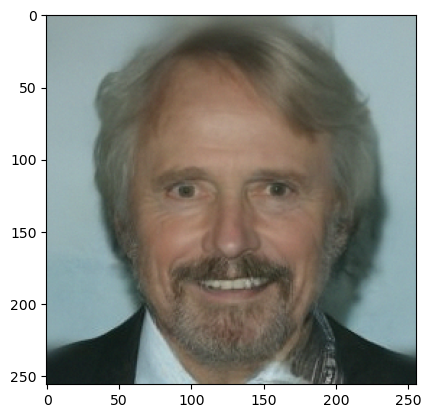

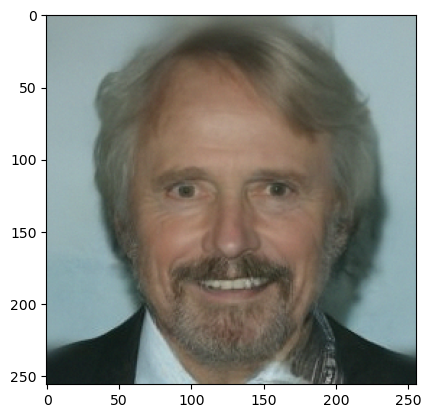

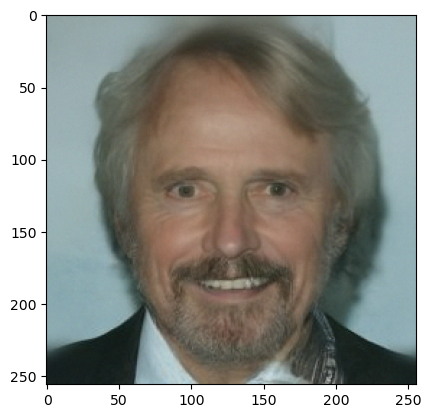

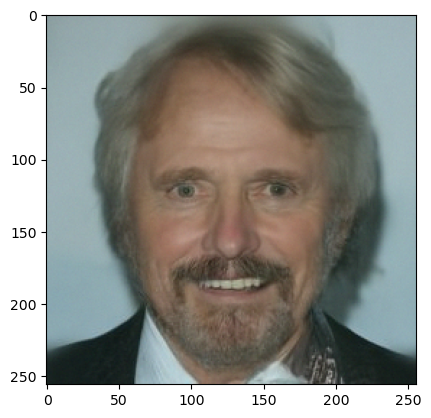

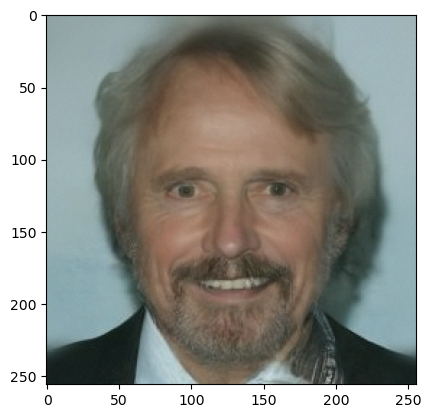

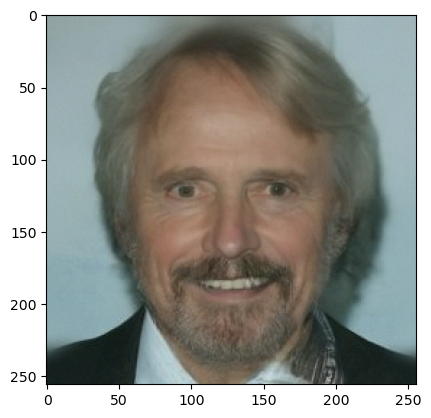

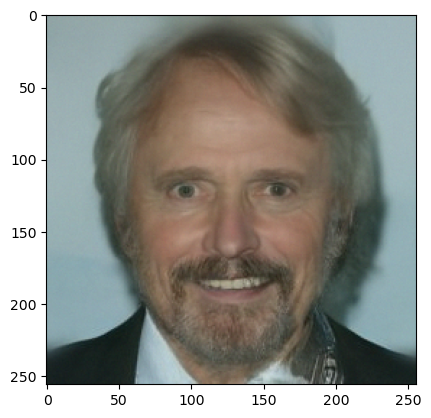

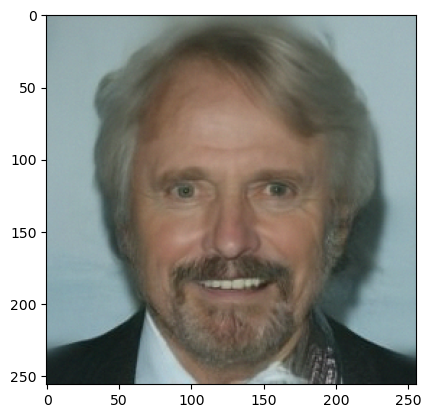

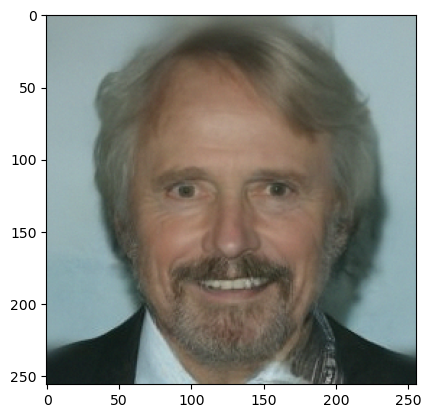

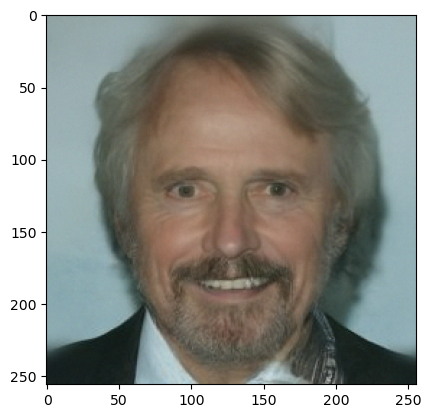

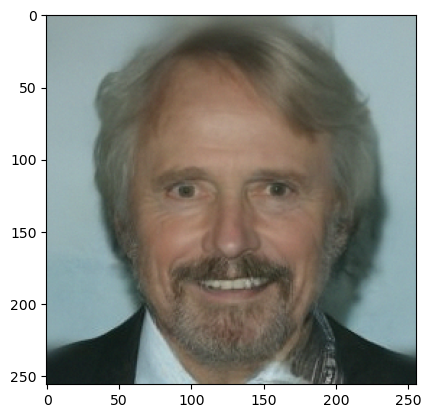

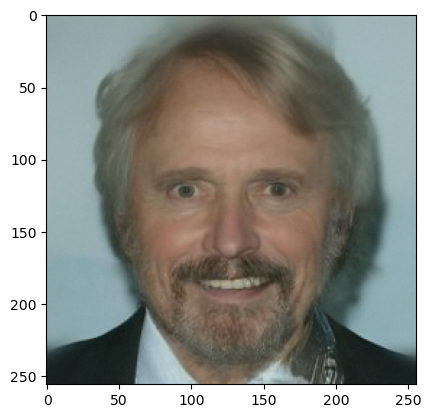

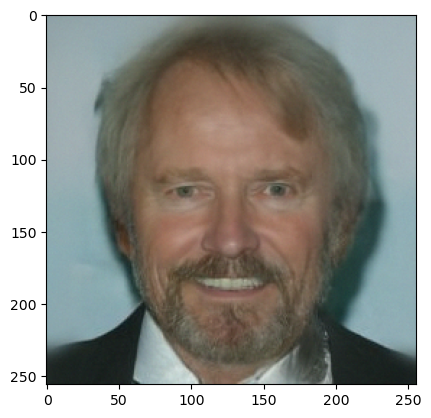

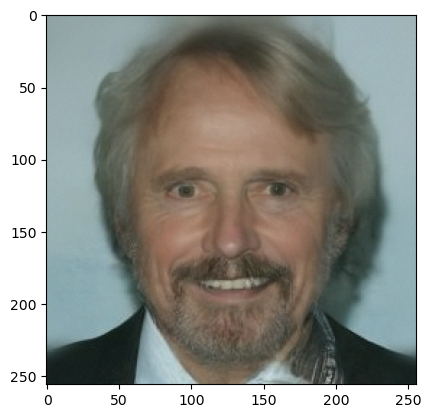

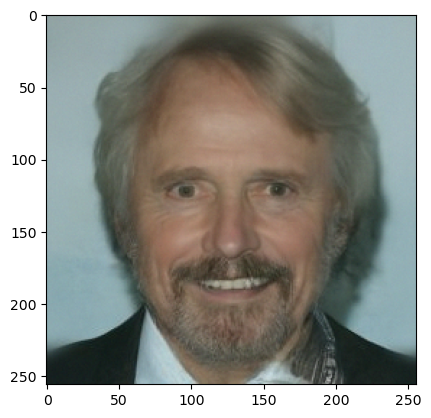

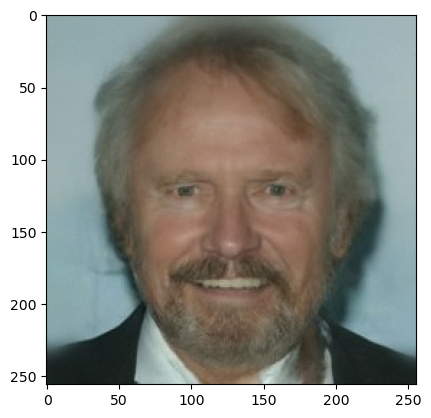

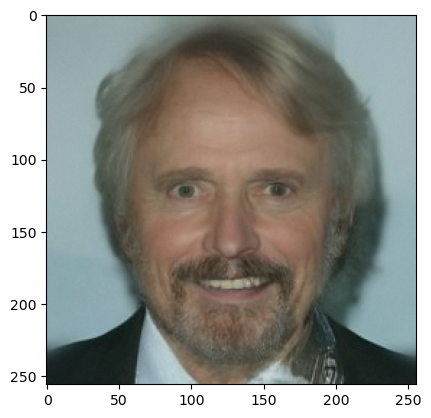

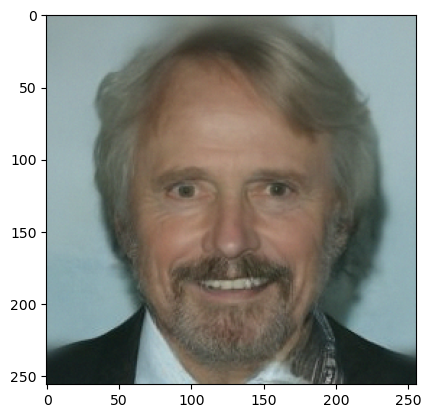

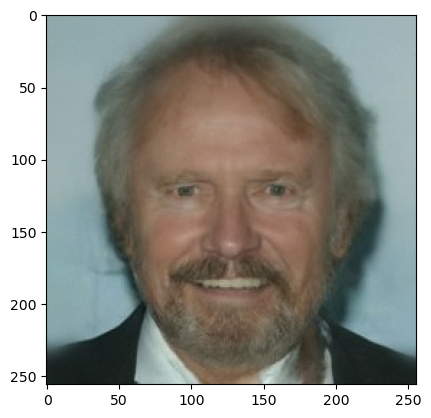

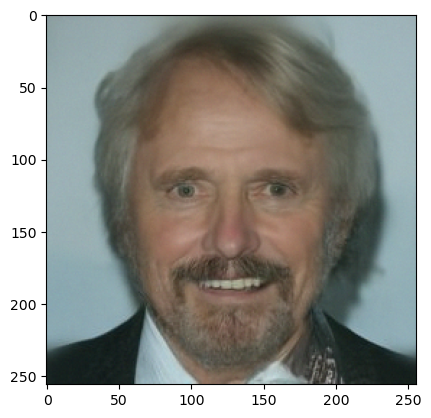

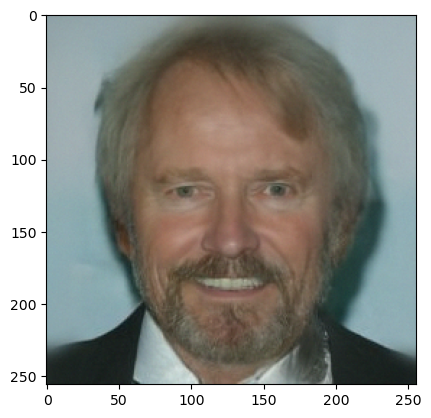

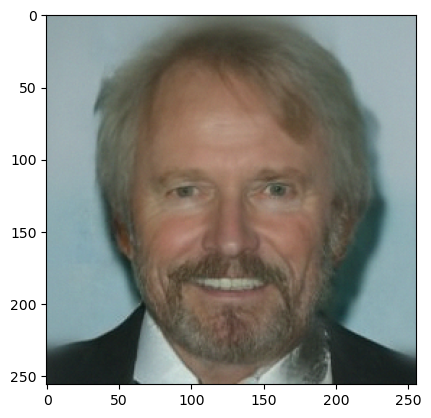

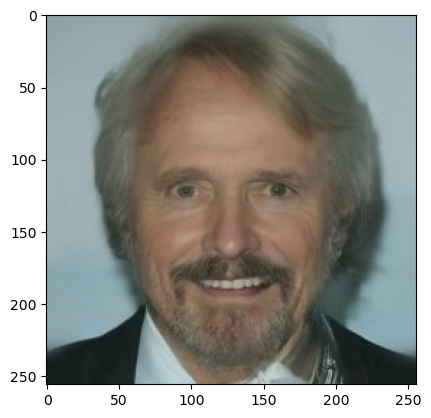

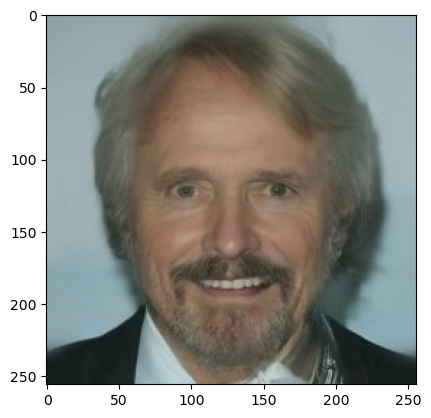

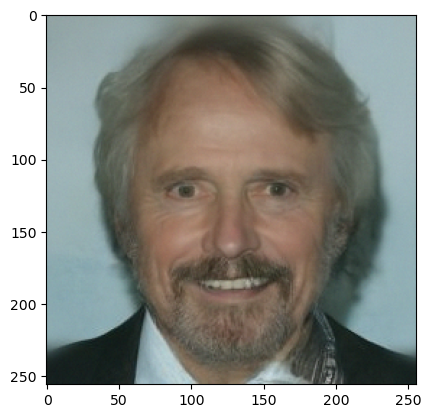

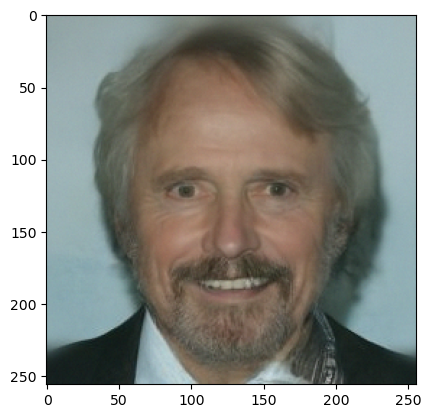

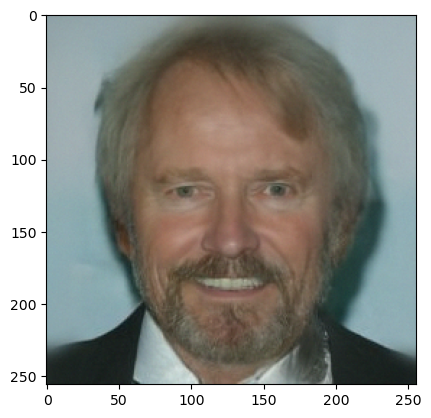

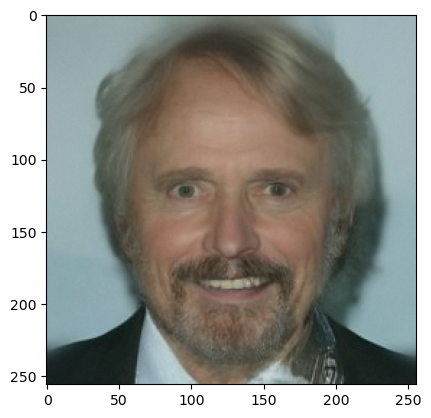

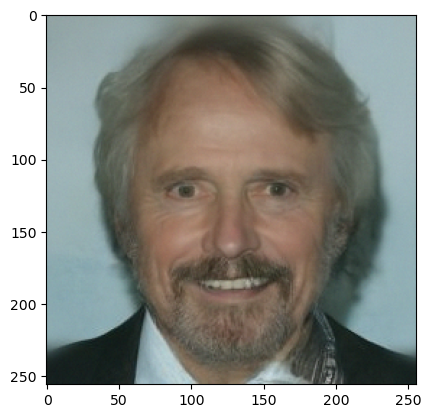

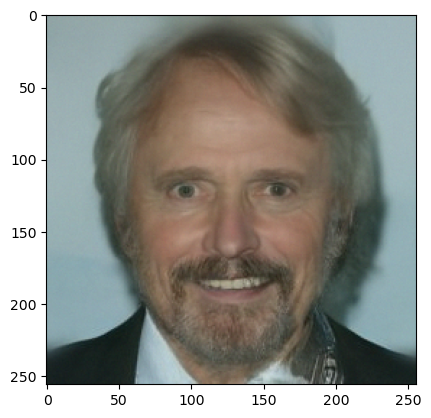

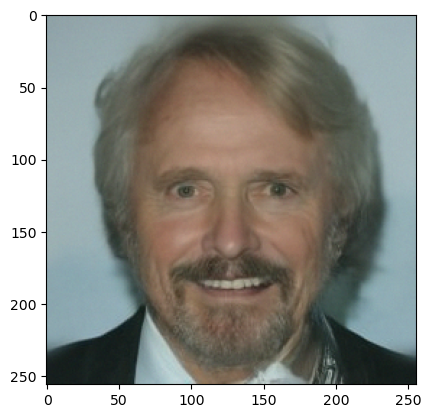

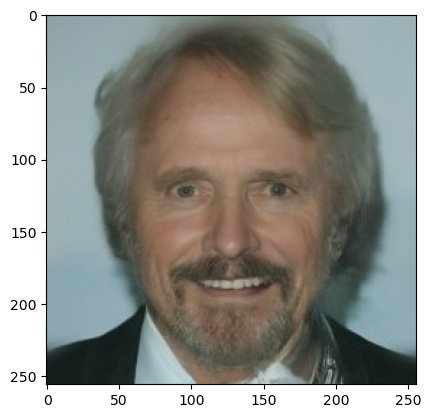

In [ ]:
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

n = 16
unet = ddpm.unet.to(device)
scheduler = ddpm.scheduler
scheduler.set_timesteps(n)

x = torch.randn((1, 3, 256, 256)).to(device)
timesteps = scheduler.timesteps

def predict(particles, unet, scheduler, i):
    t = timesteps[i]
    t_next = timesteps[i+1]
    alpha_bar_t_next = scheduler.alphas_cumprod[t]
    alpha_bar_t = scheduler.alphas_cumprod[t_next]
    noise = (((1 - alpha_bar_t) / (1 - alpha_bar_t_next)) * 
                          (1 - (alpha_bar_t_next / alpha_bar_t))).sqrt()
    with torch.no_grad():
        noise_pred = unet(particles, t).sample
        mean = scheduler.step(noise_pred, t, particles).prev_sample
    return mean, noise/3
    
def log_likelihood(x, mean, std):
    return - 1/2 * torch.sum((x - mean)**2 / std, dim=(1, 2, 3))

mask = torch.ones((1, 3, 256, 256)).to(device)
mask[:, :, 128:, :] = 0
plot_image(tensor_image*mask)

y = (mask*tensor_image).to(device) # (1, 3, 256, 256)
N = 32
particles = torch.randn((N, 3, 256, 256)).to(device)

for i in tqdm(range(len(timesteps)-1)):
        mean, noise = predict(particles, unet, scheduler, i)
        particles = mean + noise*torch.randn(x.shape).to(device)
        alpha_bar = scheduler.alphas_cumprod[timesteps[i]].to(device)
        alpha_bar_up =  scheduler.alphas_cumprod[timesteps[i+1]].to(device)

        log_weights = log_likelihood(alpha_bar**0.5*y, mean*mask, noise**2+1-alpha_bar) - \
            log_likelihood(alpha_bar_up**0.5*y, particles*mask, 1-alpha_bar_up)

        I = Categorical(logits=100*log_weights/log_weights.max()).sample((N,))
        z = torch.randn(particles.shape).to(device)
        K = noise**2 / (noise**2+1-alpha_bar)
        particles_unmasked = K*alpha_bar**0.5*y + (1-K)*mean*mask + (1-alpha_bar)**.5*K**.5*z*mask
        particles_masked = (mean+noise*z)*(1-mask)
        particles = particles_masked+particles_unmasked
        particles = particles[I]
        print(log_weights, I)
        
        
        
for i in range(N):
    plot_image(particles[i])
del unet, scheduler, x, particles, mean, noise, log_weights, I, z, particles_unmasked, particles_masked